# Principal Component Anaysis
**Course:** HUDK 4050, Week 8  
**Author:** Zecheng Chang  
**Asignment:** ICE6  
**Objectives:**  
At the end of this ICE, I'll be able to:
1. develop intuitions about principal component analysis
2. implement the PCA algorithm for dimension reduction purposes

## Principal Component Analysis

In [1]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

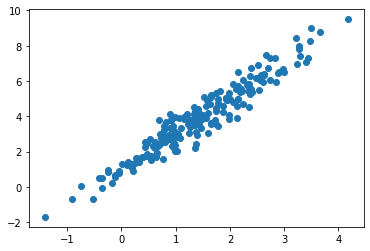

In [2]:
np.random.seed(3)

X = np.random.randn(200)+1.5
# array of 200 values of X with means of 1 and sd of 1.5
res = 0.5 * np.random.randn(200)
# generating 200 residuals with sd of 0.5
y= 1 + 2* X +res
twoDData = np.c_[X,y]

plt.scatter(twoDData[:,0], twoDData[:,1]);

In [3]:
np.std(res)

0.5464702200970851

Intead of build a simple linear regression model to predit y using Xs, we want to use an unsupervised learning algorithm to learn about the relationship between Xs and ys by finding a list of the principal axes in the data, and using those axes to describe the dataset.

In [4]:
# using `PCA` estimator from sklearn

pca = PCA(n_components=2)
pca.fit(twoDData)

PCA(n_components=2)

In [5]:
print(pca.components_)

[[-0.42758165 -0.90397673]
 [ 0.90397673 -0.42758165]]


The first vector is [-0.42758, -0.90397]
The second vector is [0.9040, -0.42758]

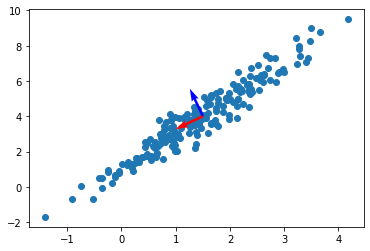

In [6]:
plt.scatter(twoDData[:,0], twoDData[:,1])
origin = np.array([[1.5,1.5],[4,4]])
plt.quiver(*origin,pca.components_[0,:],pca.components_[1,:],color=['b','r'],scale=11)

In [7]:
print(pca.explained_variance_)

[4.98631526 0.05767733]


From the `pca.explained_variance` we can know that the first vector can explain more than the second one

We can use them to do dimension reduction, if then number of principal component is smaller than the origin data dimensions

In [8]:
# transform 2D to 1D
pca = PCA(n_components=1)
pca.fit(twoDData)
twoDData_dr = pca.transform(twoDData)
print("original shape:   ", twoDData.shape)
print("transformed shape:", twoDData_dr.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


## PCA for dimension reduction

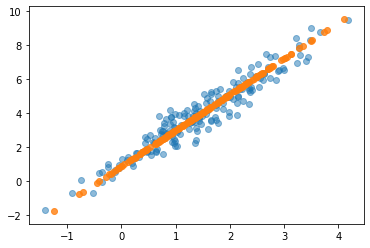

In [9]:
twoDData_new = pca.inverse_transform(twoDData_dr)
plt.scatter(twoDData[:, 0], twoDData[:, 1], alpha=0.5)
plt.scatter(twoDData_new[:, 0], twoDData_new[:, 1], alpha=0.8);

The blue points are the origin data, and the orange points are the projections,

## PCA example using real data

In [10]:
ICEdata = pd.read_csv('ICE6_Data.csv')
ICEdata.head(3)

,id,prior_prob_count,prior_percent_correct,problems_attempted,mean_correct,mean_hint,mean_attempt,mean_confidence
0,172777,650,0.723077,4,1.000000,0.000000,1.000000,0.550159
1,175658,1159,0.800690,22,0.454545,2.227273,1.227273,0.437515
2,175669,1239,0.656981,11,0.636364,1.363636,1.727273,0.511060


In [11]:
ICEdata_noid = ICEdata.drop(['id'], axis = 1)
icepca = PCA(n_components=7)
icepca.fit(ICEdata_noid)

print("The principal components are:")
print(icepca.components_)
print("The explained variances are:")
print(icepca.explained_variance_)

The principal components are:
[[ 9.99998379e-01  3.25231653e-05  1.72229676e-03  6.65415156e-05
   4.97054823e-04  1.49367002e-04  1.15030348e-05]
 [-1.73541120e-03  1.03037706e-03  9.99602228e-01  2.30861751e-03
   2.23020180e-02  1.69662730e-02 -8.64582845e-04]
 [-3.87330335e-04 -3.27396081e-02 -2.70451869e-02 -1.24635620e-01
   6.73010236e-01  7.27812593e-01  2.92226368e-03]
 [ 2.29120283e-04  3.26414469e-02  3.68040760e-03  1.78860696e-01
  -7.05688901e-01  6.84765009e-01  5.46329794e-03]
 [ 1.63571033e-04 -1.96336169e-01  6.70115719e-03 -9.52166155e-01
  -2.19898499e-01  3.19977181e-02 -7.35362922e-02]
 [ 1.91456302e-05 -9.79282671e-01  7.60612436e-04  1.99617334e-01
  -2.17110326e-03 -7.96442781e-03  3.30097853e-02]
 [ 1.73255132e-06 -1.78647923e-02 -1.39538358e-03  7.74726598e-02
   1.42375081e-02  3.24800341e-03 -9.96726458e-01]]
The explained variances are:
[1.01909636e+05 9.65917304e+01 8.07223611e-01 4.21069102e-01
 4.13364216e-02 1.60996431e-02 1.08938450e-02]


The first two componenents can explain most of the variance, so we can reduce the dimension to 2D

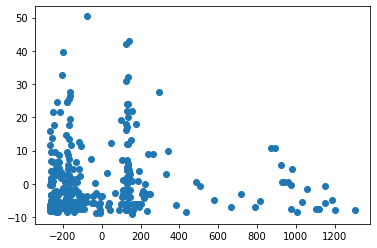

In [12]:
icedata_dr = icepca.transform(ICEdata_noid)
plt.scatter(icedata_dr[:,0], icedata_dr[:,1]);

Looks like their are 2 or 3 clusters, try KMeans

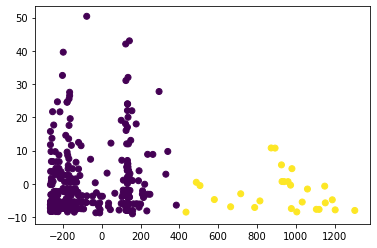

In [13]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(icedata_dr)
cluster_kmeans_2 = kmeans_2.predict(icedata_dr)

plt.scatter(icedata_dr[:, 0], icedata_dr[:, 1], c=cluster_kmeans_2, cmap='viridis');

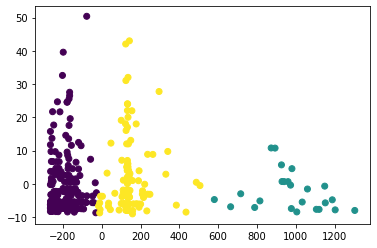

In [14]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(icedata_dr)
cluster_kmeans_3 = kmeans_3.predict(icedata_dr)

plt.scatter(icedata_dr[:, 0], icedata_dr[:, 1], c=cluster_kmeans_3, cmap='viridis');

To me, the k=3 make more sense, because it better split the points